In [80]:
import pandas as pd 
import numpy as np 

In [81]:
data = pd.read_csv(r'C:\Users\siddh\Downloads\Airfares.csv')

In [82]:
data.describe()

,COUPON,NEW,HI,S_POP,E_POP,DISTANCE,PAX
count,638.000000,638.000000,638.000000,6.380000e+02,6.380000e+02,638.000000,638.000000
mean,1.202335,2.753918,4442.141129,4.557004e+06,3.194503e+06,975.653605,12782.214734
std,0.203821,0.760448,1724.267051,3.010985e+06,2.735604e+06,646.242403,13202.228860
min,1.000000,0.000000,1230.480000,2.983800e+04,1.117450e+05,114.000000,1504.000000
25%,1.040000,3.000000,3090.137500,1.862106e+06,1.228816e+06,455.000000,5328.500000
50%,1.150000,3.000000,4208.185000,3.532657e+06,2.195215e+06,850.000000,7792.000000
75%,1.297500,3.000000,5480.575000,7.830332e+06,4.549784e+06,1306.250000,14090.500000
max,1.940000,3.000000,10000.000000,9.056076e+06,9.056076e+06,2764.000000,73892.000000


In [83]:
colstocheck = data.columns

In [84]:
colstocheck

Index(['S_CODE', 'S_CITY', 'E_CODE', 'E_CITY', 'COUPON', 'NEW', 'VACATION',
       'SW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'SLOT', 'GATE',
       'DISTANCE', 'PAX', 'FARE'],
      dtype='object')

In [85]:
data.head()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3.0,No,Yes,5291.99,"$28,637","$21,112",3036732,205711,Free,Free,312,7864,$64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3.0,No,No,5419.16,"$26,993","$29,838",3532657,7145897,Free,Free,576,8820,$174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3.0,No,No,9185.28,"$30,124","$29,838",5787293,7145897,Free,Free,364,6452,$207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3.0,No,Yes,2657.35,"$29,260","$29,838",7830332,7145897,Controlled,Free,612,25144,$85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3.0,No,Yes,2657.35,"$29,260","$29,838",7830332,7145897,Free,Free,612,25144,$85.47


In [86]:
#To remove currency $ and , sign
data[colstocheck] = data[colstocheck].replace({'\$':''},regex=True)
data[colstocheck] = data[colstocheck].replace({',':''},regex=True)

In [87]:
data.head()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3.0,No,Yes,5291.99,28637,21112,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3.0,No,No,5419.16,26993,29838,3532657,7145897,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3.0,No,No,9185.28,30124,29838,5787293,7145897,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3.0,No,Yes,2657.35,29260,29838,7830332,7145897,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3.0,No,Yes,2657.35,29260,29838,7830332,7145897,Free,Free,612,25144,85.47


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S_CODE    638 non-null    object 
 1   S_CITY    638 non-null    object 
 2   E_CODE    638 non-null    object 
 3   E_CITY    638 non-null    object 
 4   COUPON    638 non-null    float64
 5   NEW       638 non-null    float64
 6   VACATION  638 non-null    object 
 7   SW        638 non-null    object 
 8   HI        638 non-null    float64
 9   S_INCOME  638 non-null    object 
 10  E_INCOME  638 non-null    object 
 11  S_POP     638 non-null    int64  
 12  E_POP     638 non-null    int64  
 13  SLOT      638 non-null    object 
 14  GATE      638 non-null    object 
 15  DISTANCE  638 non-null    int64  
 16  PAX       638 non-null    int64  
 17  FARE      638 non-null    object 
dtypes: float64(3), int64(4), object(11)
memory usage: 89.8+ KB


In [89]:
#Converting the required variables to numeric
data['FARE'] = pd.to_numeric(data['FARE'],errors='coerce')
data['E_INCOME'] = pd.to_numeric(data['E_INCOME'],errors='coerce')
data['S_INCOME'] = pd.to_numeric(data['S_INCOME'],errors='coerce')

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S_CODE    638 non-null    object 
 1   S_CITY    638 non-null    object 
 2   E_CODE    638 non-null    object 
 3   E_CITY    638 non-null    object 
 4   COUPON    638 non-null    float64
 5   NEW       638 non-null    float64
 6   VACATION  638 non-null    object 
 7   SW        638 non-null    object 
 8   HI        638 non-null    float64
 9   S_INCOME  638 non-null    int64  
 10  E_INCOME  638 non-null    int64  
 11  S_POP     638 non-null    int64  
 12  E_POP     638 non-null    int64  
 13  SLOT      638 non-null    object 
 14  GATE      638 non-null    object 
 15  DISTANCE  638 non-null    int64  
 16  PAX       638 non-null    int64  
 17  FARE      638 non-null    float64
dtypes: float64(4), int64(6), object(8)
memory usage: 89.8+ KB


In [91]:
data.describe()

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
count,638.000000,638.000000,638.000000,638.000000,638.000000,6.380000e+02,6.380000e+02,638.000000,638.000000,638.000000
mean,1.202335,2.753918,4442.141129,27759.860502,27663.727273,4.557004e+06,3.194503e+06,975.653605,12782.214734,160.876677
std,0.203821,0.760448,1724.267051,3596.207837,4611.325018,3.010985e+06,2.735604e+06,646.242403,13202.228860,76.022436
min,1.000000,0.000000,1230.480000,14600.000000,14600.000000,2.983800e+04,1.117450e+05,114.000000,1504.000000,42.470000
25%,1.040000,3.000000,3090.137500,24706.000000,23903.000000,1.862106e+06,1.228816e+06,455.000000,5328.500000,106.290000
50%,1.150000,3.000000,4208.185000,28637.000000,26409.000000,3.532657e+06,2.195215e+06,850.000000,7792.000000,144.600000
75%,1.297500,3.000000,5480.575000,29693.500000,31981.000000,7.830332e+06,4.549784e+06,1306.250000,14090.500000,209.350000
max,1.940000,3.000000,10000.000000,38813.000000,38813.000000,9.056076e+06,9.056076e+06,2764.000000,73892.000000,402.020000


In [92]:
#Looking for null values
data.isnull().sum()

S_CODE      0
S_CITY      0
E_CODE      0
E_CITY      0
COUPON      0
NEW         0
VACATION    0
SW          0
HI          0
S_INCOME    0
E_INCOME    0
S_POP       0
E_POP       0
SLOT        0
GATE        0
DISTANCE    0
PAX         0
FARE        0
dtype: int64

In [93]:
data.dropna(inplace=True,axis=0)
data.shape

(638, 18)

In [94]:
## Removing the unwanted columns that have text values
dt=data.drop(['S_CODE','S_CITY','E_CODE','E_CITY'],axis=1)
dt.shape

(638, 14)

In [95]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 0 to 637
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   COUPON    638 non-null    float64
 1   NEW       638 non-null    float64
 2   VACATION  638 non-null    object 
 3   SW        638 non-null    object 
 4   HI        638 non-null    float64
 5   S_INCOME  638 non-null    int64  
 6   E_INCOME  638 non-null    int64  
 7   S_POP     638 non-null    int64  
 8   E_POP     638 non-null    int64  
 9   SLOT      638 non-null    object 
 10  GATE      638 non-null    object 
 11  DISTANCE  638 non-null    int64  
 12  PAX       638 non-null    int64  
 13  FARE      638 non-null    float64
dtypes: float64(4), int64(6), object(4)
memory usage: 74.8+ KB


In [96]:
##First lets take a look at the fare variable
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Average fare for a route')

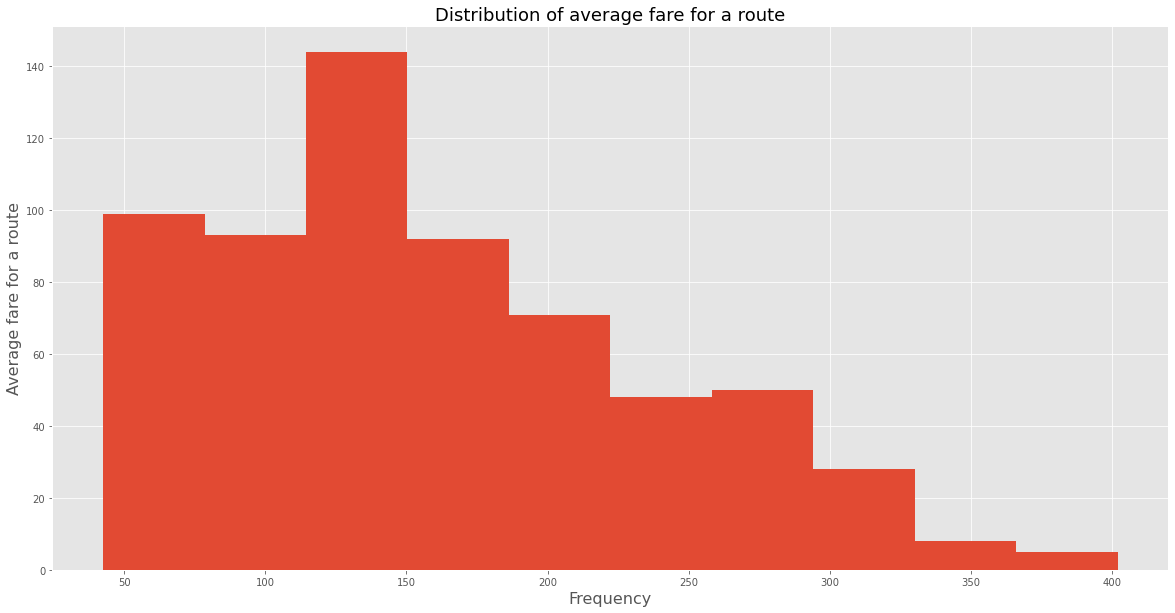

In [97]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
plt.hist(data['FARE'])
plt.title('Distribution of average fare for a route', fontsize=18)
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Average fare for a route', fontsize=16)

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

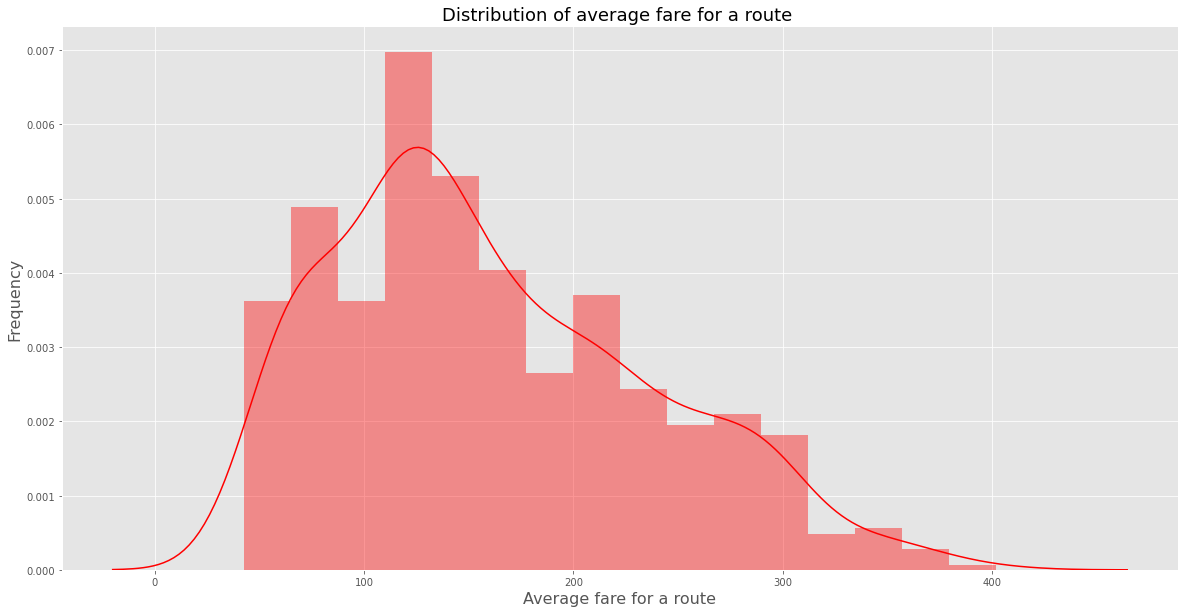

In [98]:
plt.figure(figsize=(20,10))
sns.distplot(data['FARE'],color='red')
plt.title('Distribution of average fare for a route ', fontsize=18)
plt.xlabel('Average fare for a route', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

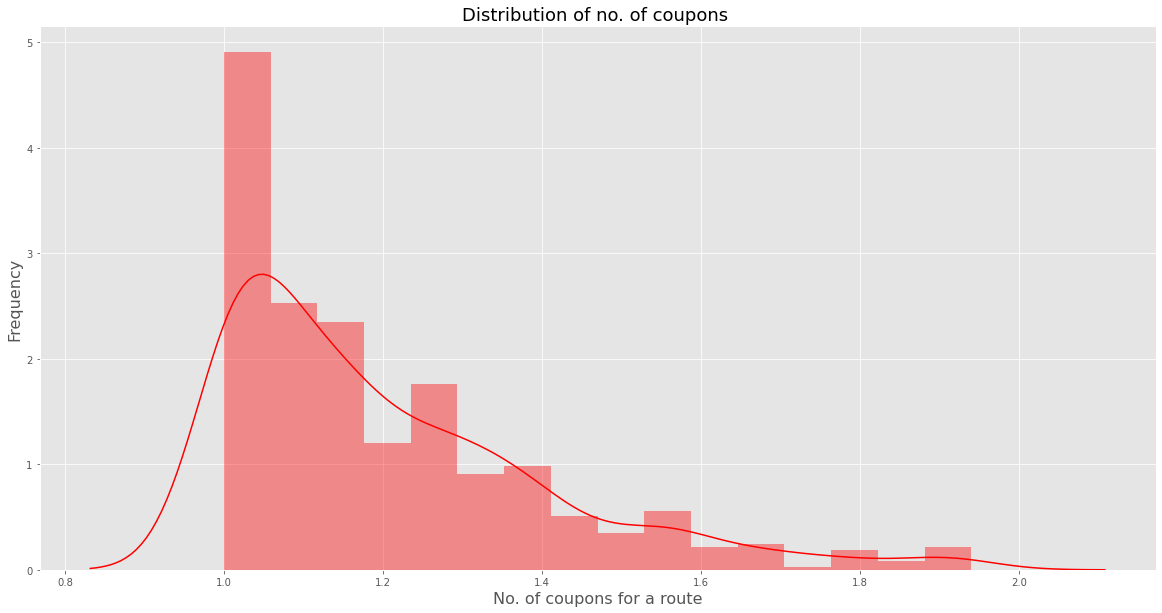

In [99]:
plt.figure(figsize=(20,10))
sns.distplot(dt['COUPON'],color='red')
plt.title('Distribution of no. of coupons ', fontsize=18)
plt.xlabel('No. of coupons for a route', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [42]:
#The above histogram shows the distribution of number of coupons for a route. It can be seen that for majority of the routes, the average number of coupons that are present are close to 1.

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

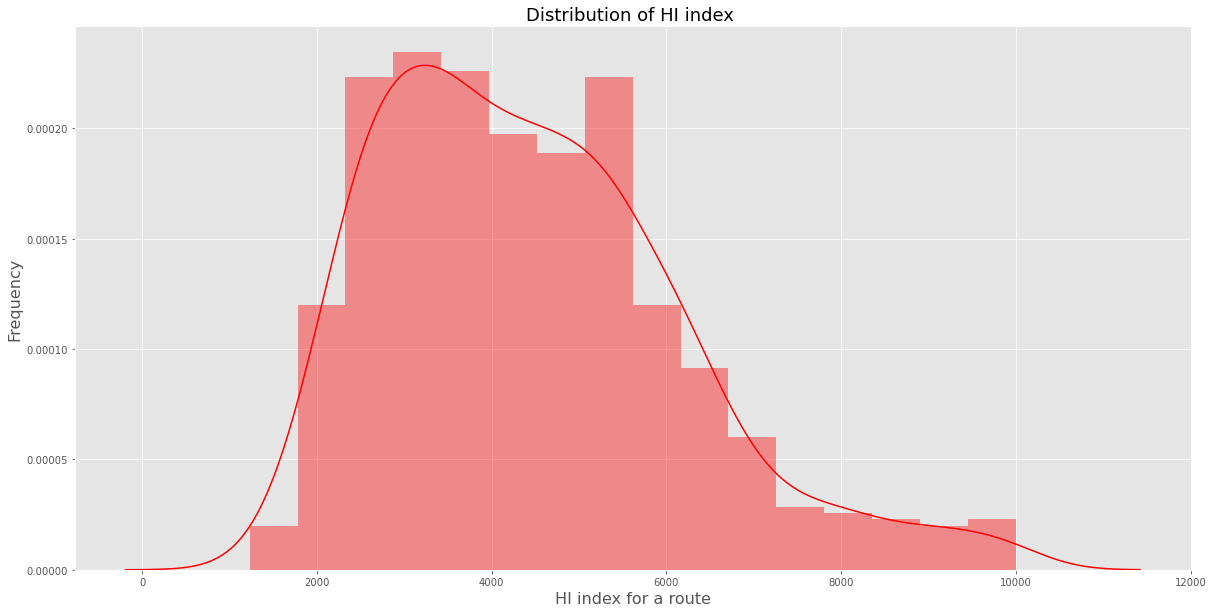

In [100]:
plt.figure(figsize=(20,10))
sns.distplot(dt['HI'],color='red')
plt.title('Distribution of HI index ', fontsize=18)
plt.xlabel('HI index for a route', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [44]:
#The above histogram shows the distribution of HI Index, a measure of market concentration (higher number means smaller number of available carriers on that route). The distribution seems to be approximately normal for HI index

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

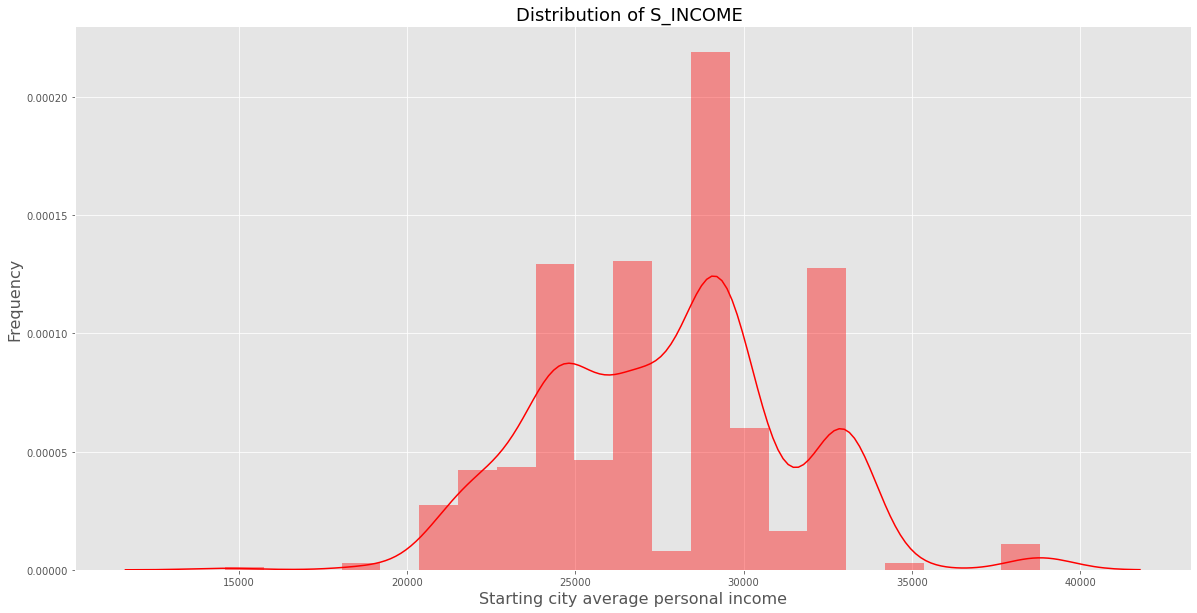

In [102]:
plt.figure(figsize=(20,10))
sns.distplot(dt['S_INCOME'],color='red')
plt.title('Distribution of S_INCOME ', fontsize=18)
plt.xlabel('Starting city average personal income', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [103]:
#Correlation
correlation = dt.corr()

<AxesSubplot:>

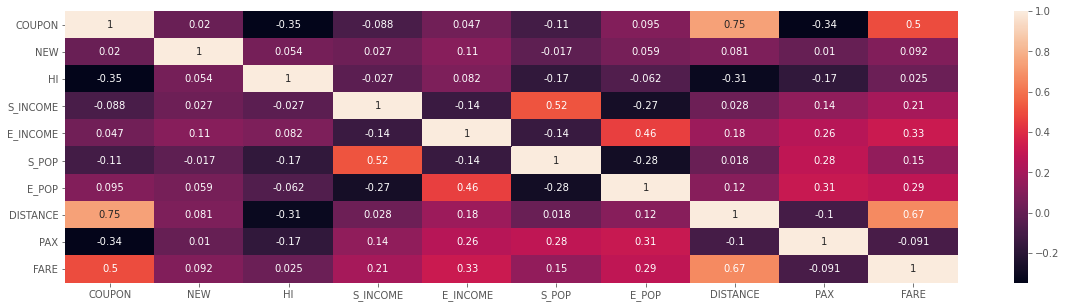

In [104]:
plt.figure(figsize=(20,5))
sns.heatmap(correlation, xticklabels = correlation.columns , yticklabels=correlation.columns,annot=True)

In [69]:
#The above heat-map shows the correlation between every variable.
#1 - It can be seen that FARE has highest positive correlation with DISTANCE and also has a moderate positve correlation with COUPON. It would mean that with increase in distance, the FARE is going to increase.
#2 - DISTANCE has a strong positive correlation between COUPON. It means that, if distance between two points is more, then it is likely that there will be more coupons for that route.
#3 - DISTANCE has the high negative correlation with HI. It can mean that, if distance between two points is less, then there would be lesser flights opertaing and so the HI index would be more.
#4 - COUPON has the highest positive correlation with DISTANCE. It would mean that if distance is more, then there is a possibility that there will be more coupons for that route.
#5 - COUPON has high negative correlation with HI. It would mean that if a route has lesser flights, then the HI index would be more and coupons for that route will be less.

<AxesSubplot:xlabel='COUPON', ylabel='FARE'>

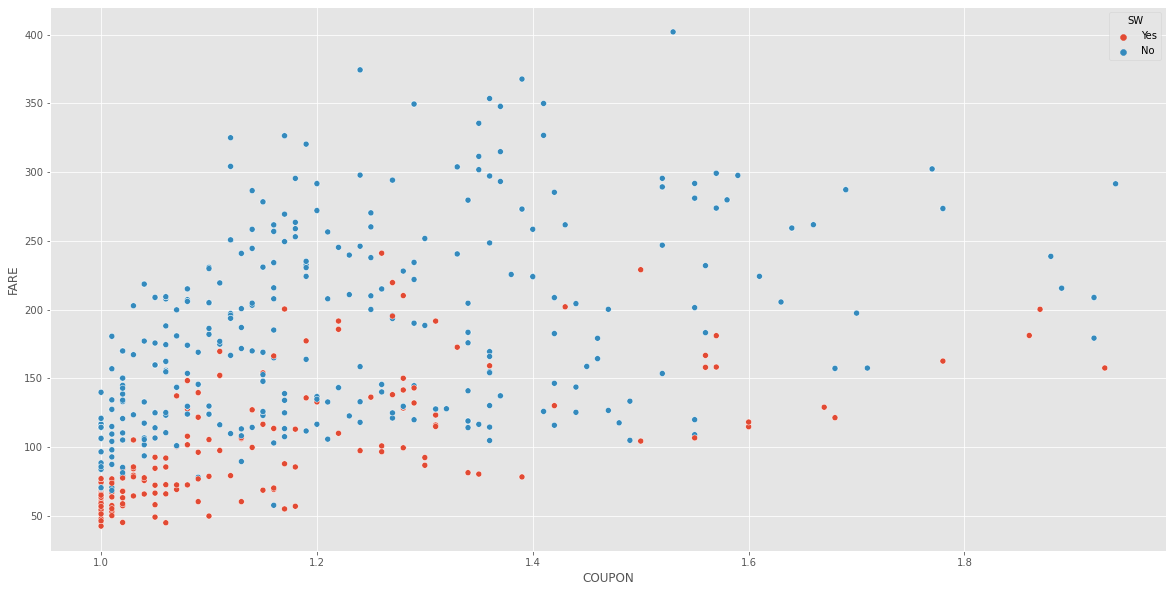

In [50]:
##  Relation between Average Fare for a route and the Average number of Coupons for the route.
plt.figure(figsize=(20,10))
sns.scatterplot(x="COUPON", y="FARE", data=dt,hue='SW')

In [71]:
#The above scatter plot explains the relationship between Average COUPONS for a route and the FARE for that route. There is a positive linear relationship between both variables. 
#With increase in FARE for a route, there are more number of coupons for that route. It can also be seen that for routes where SouthWest airlines is operating (denatoted by RED colour), the FARE is low in majority of the cases.

<AxesSubplot:xlabel='DISTANCE', ylabel='FARE'>

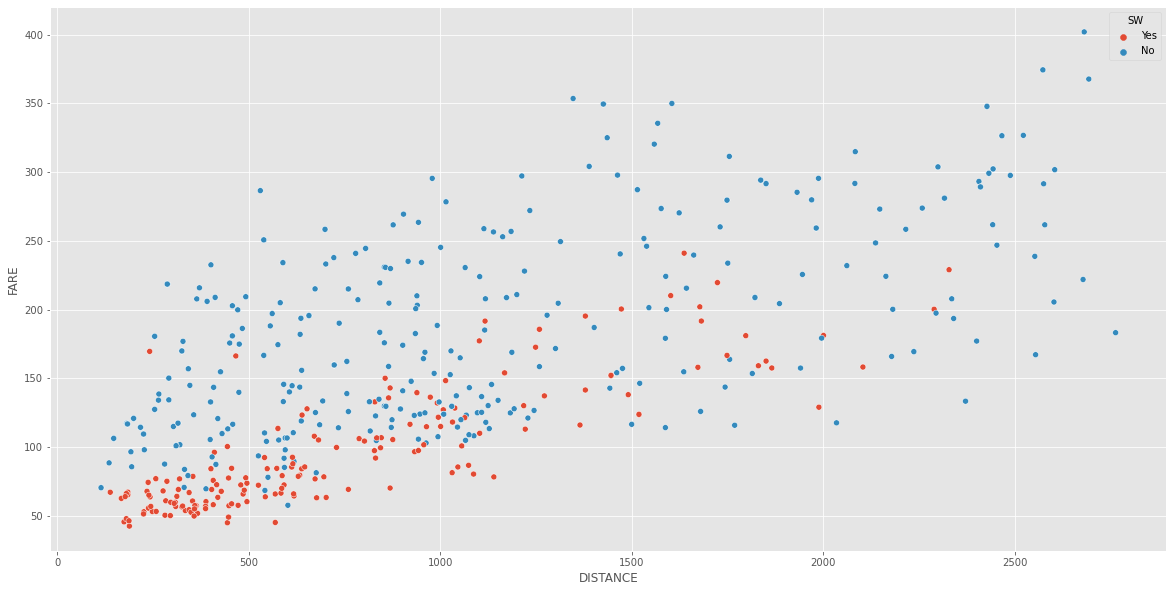

In [51]:
## Now, let's check the relationship between Average Fare for a route(FARE) and the distance between two end points.
plt.figure(figsize=(20,10))
sns.scatterplot(x="DISTANCE", y="FARE", data=dt,hue='SW')

In [73]:
#The above scatter plot explains the relationship between FARE and DISTANCE between two points. We can see that there is a strong positive correlation between DISTANCE and FARE. Also, we can infer that for majority of the cases, the FARE for a route operated by SouthWest Airlines is below $200.

<AxesSubplot:xlabel='S_INCOME', ylabel='FARE'>

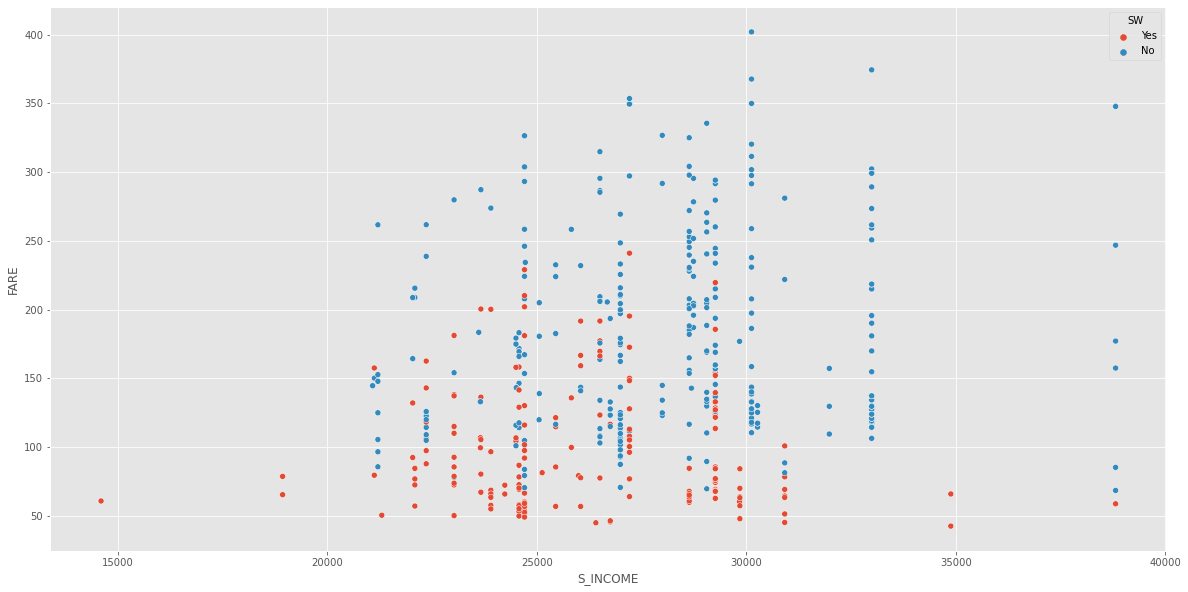

In [105]:
#Let's check the relationship between Average Fare for a route(FARE) and Starting City's Average Personal Income (S_INCOME)
plt.figure(figsize=(20,10))
sns.scatterplot(x="S_INCOME", y="FARE", data=dt,hue='SW')

In [75]:
#The above scatter plot shows he relationship between FARE and Starting City's Average Income. 
#We can see that it has a linear positive relationship between FARE and S_INCOME. Also, based on the plot we can say that, majority of the SoutWest Airlines customer starting from a city are having an average personal income in between $20000 to $30000. 
#Also, we can infer that for majority of the cases, the FARE for a route operated by SouthWest Airlines is below $200.

<AxesSubplot:xlabel='E_INCOME', ylabel='FARE'>

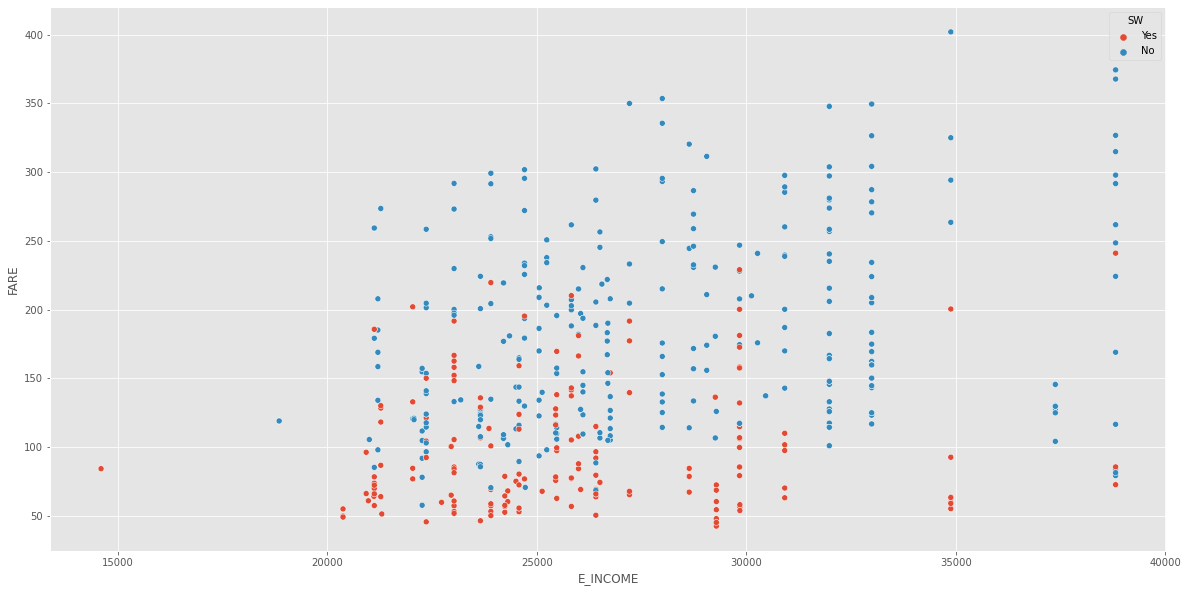

In [106]:
#Now, let's check the relationship between Average Fare for a route(FARE) 
## and Ending City's Average Personal Income (S_INCOME)
plt.figure(figsize=(20,10))
sns.scatterplot(x="E_INCOME", y="FARE", data=dt,hue='SW')

In [77]:
#The above scatter plot shows he relationship between FARE and Ending City's Average Income. 
#We can see that it has a linear positive relationship between FARE and E_INCOME. 
#Also, based on the plot we can say that, majority of the SoutWest Airlines customer ending at a city are having an average personal income in between $22000 to $30000. 

<AxesSubplot:xlabel='S_POP', ylabel='FARE'>

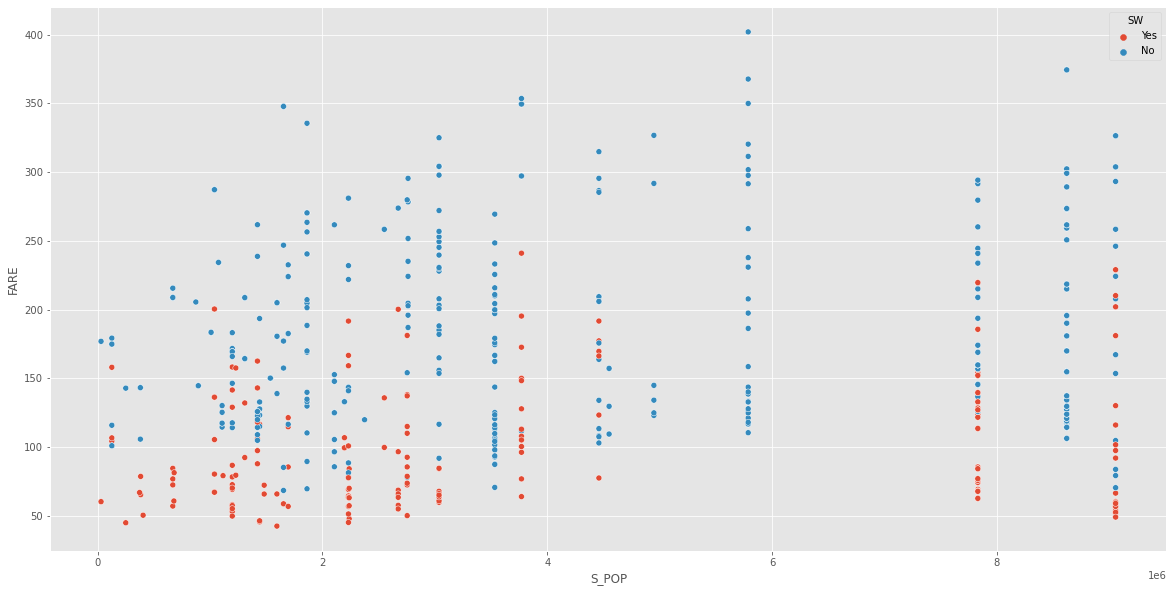

In [53]:
# let's check the relationship between Average Fare for a route(FARE) 
## and Starting city's population (S_INCOME)
plt.figure(figsize=(20,10))
sns.scatterplot(x="S_POP", y="FARE", data=dt,hue='SW')

In [81]:
#The above scatter plot explains the relationship between Avergae Fare and Starting City's population. There is a small positive correlation between both the variables. 
#It can also be verified from the heat map generated above which shows the correlation between both variables as 0.15**

<AxesSubplot:xlabel='E_POP', ylabel='FARE'>

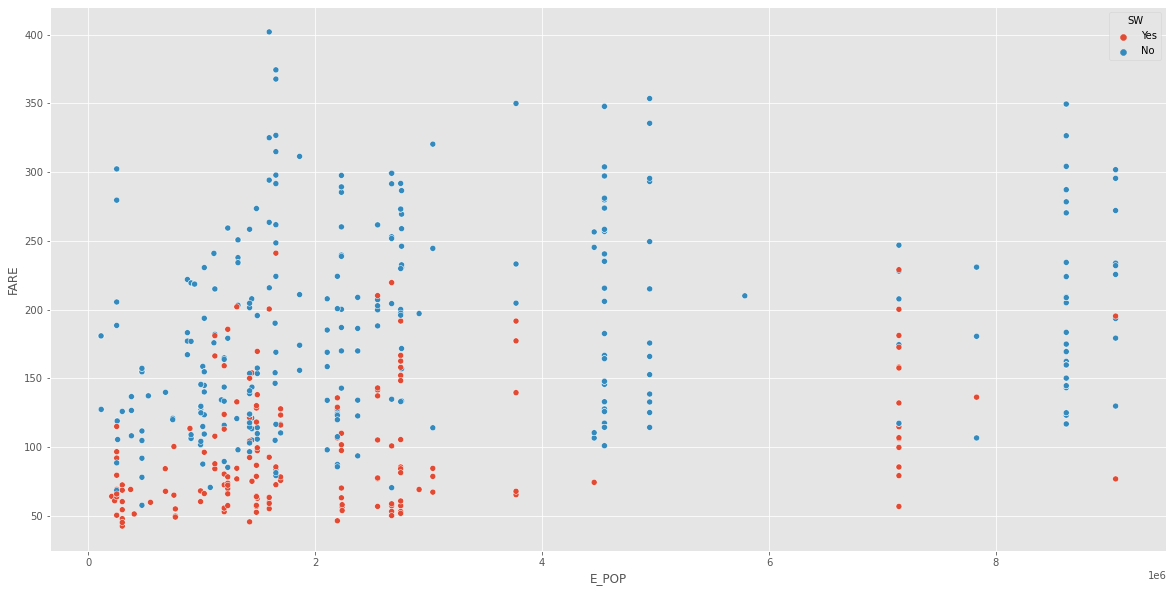

In [54]:
## Let's check the relationship between Average Fare for a route(FARE) 
## and Ending City's Population (E_POP)
plt.figure(figsize=(20,10))
sns.scatterplot(x="E_POP", y="FARE", data=dt,hue='SW')

In [83]:
#The above scatter plot explains the relationship between Avergae Fare and Ending City's population. There is a small positive correlation between both the variables. 
#It can also be verified from the heat map generated above which shows the correlation between both variables as 0.29**


In [56]:
print('Percentage of flights based on vacation category:')
dt['VACATION'].value_counts()/dt['VACATION'].value_counts().sum()

Percentage of flights based on vacation category:


No     0.733542
Yes    0.266458
Name: VACATION, dtype: float64

In [57]:
print('Percentage of flights based on SW category:')
dt['SW'].value_counts()/dt['SW'].value_counts().sum()

Percentage of flights based on SW category:


No     0.695925
Yes    0.304075
Name: SW, dtype: float64

In [58]:
print('Percentage of flights based on Slot category:')
dt['SLOT'].value_counts()/dt['SLOT'].value_counts().sum()

Percentage of flights based on Slot category:


Free          0.714734
Controlled    0.285266
Name: SLOT, dtype: float64

In [59]:
print('Percentage of flights based on Gate category:')
dt['GATE'].value_counts()/dt['GATE'].value_counts().sum()

Percentage of flights based on Gate category:


Free           0.805643
Constrained    0.194357
Name: GATE, dtype: float64

In [60]:
#1 - We can see that almost 27 percent of the flights are operated on the vacation route and the rest other flights are operated on regular routes.**
#2 - For almost 30 percent of the routes, SouthWest airlines is providing it's service.**
#3 - Almost 28.5 percent of the routes are Slot controlled.**
#4 - Similarly, almost 20 percent of the endpoints are gate controlled.**

In [107]:
# Splitting into training and test sets
from sklearn.model_selection import train_test_split

In [108]:
X = dt.drop(['FARE'],axis = 1)
Y = dt['FARE']
X1 = pd.get_dummies(X, columns=['VACATION', 'SW', 'SLOT','GATE'], drop_first = True)
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size = 0.2, random_state=42)

In [109]:
X_train

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,VACATION_Yes,SW_Yes,SLOT_Free,GATE_Free
597,1.42,3.0,4221.56,25450,31981,1694803,4549784,935,5252,0,0,1,1
328,1.35,3.0,5840.94,29055,27994,1862106,4948339,1568,3599,0,0,1,1
363,1.10,3.0,9174.83,30124,25054,5787293,2374260,483,5539,0,0,1,0
231,1.05,3.0,3316.90,29260,32991,7830332,8621121,723,73892,0,0,0,0
210,1.17,1.0,2173.45,22360,25995,1421287,1115048,615,6224,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.19,3.0,5605.06,30124,28637,5787293,3036732,1559,8756,0,0,1,1
106,1.29,3.0,3333.11,30916,26681,2230831,873131,2679,6464,1,0,1,1
270,1.40,3.0,2617.87,25450,32991,1694803,8621121,1103,7543,0,0,1,0
435,1.01,3.0,3935.01,24575,21121,1197234,1228816,359,10349,1,1,1,1


In [110]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
est = sm.OLS(Y_train, X_train).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   FARE   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     136.3
Date:                Thu, 19 Aug 2021   Prob (F-statistic):          2.60e-154
Time:                        18:03:12   Log-Likelihood:                -2544.2
No. Observations:                 510   AIC:                             5116.
Df Residuals:                     496   BIC:                             5176.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           25.6652     31.314      0.820      0.413     -35.859      87.189
COUPON           2.9486     13.523      0.218      0.827     -23.620      29.517
NEW             -2.7668      2.222     -1.245      0.214      -7.133       1.599
HI               0.0088      0.001      7.642      0.000       0.007       0.011
S_INCOME         0.0009      0.001      1.593      0.112      -0.000       0.002
E_INCOME         0.0013      0.000      3.089      0.002       0.000       0.002
S_POP         3.692e-06   7.47e-07      4.945      0.000    2.23e-06    5.16e-06
E_POP         4.276e-06   8.48e-07      5.043      0.000    2.61e-06    5.94e-06
DISTANCE         0.0752      0.004     18.620      0.000       0.067       0.083
PAX             -0.0009      0.000     -5.478      0.000      -0.001      -0.001
VACATION_Yes   -35.2007      4.151     -8.481      0.000     -43.356     -27.046
SW_Yes         -40.7168      4.211     -9.670      0.000     -48.990     -32.444
SLOT_Free      -18.3421      4.405     -4.164      0.000     -26.997      -9.687
GATE_Free      -22.6520      4.598     -4.927      0.000     -31.686     -13.618
==============================================================================
Omnibus:                        2.897   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.235   Jarque-Bera (JB):                2.915
Skew:                           0.183   Prob(JB):                        0.233
Kurtosis:                       2.944   Cond. No.                     1.24e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
X = dt.drop(['FARE','COUPON'],axis = 1)
Y = dt['FARE']
X1 = pd.get_dummies(X, columns=['VACATION', 'SW', 'SLOT','GATE'], drop_first = True)
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size = 0.2, random_state=42)

In [117]:
X_train = sm.add_constant(X_train)
est = sm.OLS(Y_train, X_train).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   FARE   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     148.0
Date:                Thu, 19 Aug 2021   Prob (F-statistic):          2.14e-155
Time:                        18:25:16   Log-Likelihood:                -2544.3
No. Observations:                 510   AIC:                             5115.
Df Residuals:                     497   BIC:                             5170.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           30.0585     23.948      1.255      0.210     -16.993      77.110
NEW             -2.8054      2.213     -1.268      0.206      -7.153       1.543
HI               0.0087      0.001      7.952      0.000       0.007       0.011
S_INCOME         0.0009      0.001      1.579      0.115      -0.000       0.002
E_INCOME         0.0013      0.000      3.084      0.002       0.000       0.002
S_POP         3.679e-06   7.44e-07      4.949      0.000    2.22e-06    5.14e-06
E_POP         4.288e-06   8.45e-07      5.072      0.000    2.63e-06    5.95e-06
DISTANCE         0.0758      0.003     26.355      0.000       0.070       0.082
PAX             -0.0009      0.000     -6.064      0.000      -0.001      -0.001
VACATION_Yes   -35.2797      4.131     -8.541      0.000     -43.396     -27.164
SW_Yes         -40.8051      4.187     -9.745      0.000     -49.032     -32.579
SLOT_Free      -18.4471      4.375     -4.217      0.000     -27.042      -9.852
GATE_Free      -22.7110      4.586     -4.953      0.000     -31.720     -13.702
==============================================================================
Omnibus:                        2.890   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.236   Jarque-Bera (JB):                2.909
Skew:                           0.183   Prob(JB):                        0.233
Kurtosis:                       2.943   Cond. No.                     9.17e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.17e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
import statsmodels.api as sm
import statsmodels

In [126]:
from statsmodels.regression import linear_model

In [127]:
X_train = sm.add_constant(X_train)
sm_ols = linear_model.OLS(Y_train, X_train) # i know, the param order is inverse
sm_model = sm_ols.fit()

In [128]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   FARE   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     148.0
Date:                Thu, 19 Aug 2021   Prob (F-statistic):          2.14e-155
Time:                        18:53:33   Log-Likelihood:                -2544.3
No. Observations:                 510   AIC:                             5115.
Df Residuals:                     497   BIC:                             5170.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           30.0585     23.948      1.255      0.210     -16.993      77.110
NEW             -2.8054      2.213     -1.268      0.206      -7.153       1.543
HI               0.0087      0.001      7.952      0.000       0.007       0.011
S_INCOME         0.0009      0.001      1.579      0.115      -0.000       0.002
E_INCOME         0.0013      0.000      3.084      0.002       0.000       0.002
S_POP         3.679e-06   7.44e-07      4.949      0.000    2.22e-06    5.14e-06
E_POP         4.288e-06   8.45e-07      5.072      0.000    2.63e-06    5.95e-06
DISTANCE         0.0758      0.003     26.355      0.000       0.070       0.082
PAX             -0.0009      0.000     -6.064      0.000      -0.001      -0.001
VACATION_Yes   -35.2797      4.131     -8.541      0.000     -43.396     -27.164
SW_Yes         -40.8051      4.187     -9.745      0.000     -49.032     -32.579
SLOT_Free      -18.4471      4.375     -4.217      0.000     -27.042      -9.852
GATE_Free      -22.7110      4.586     -4.953      0.000     -31.720     -13.702
==============================================================================
Omnibus:                        2.890   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.236   Jarque-Bera (JB):                2.909
Skew:                           0.183   Prob(JB):                        0.233
Kurtosis:                       2.943   Cond. No.                     9.17e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.17e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [131]:
y_predicted = sm_model.predict(X_train)
y_predicted


597    173.551490
328    237.639259
363    205.935465
231    172.359051
210     33.759745
          ...    
71     238.196025
106    245.964923
270    211.662485
435     15.667280
102    168.842214
Length: 510, dtype: float64